# Classification Project
### • Probablity of heart attack

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

In [2]:
df = pd.read_csv("heartReport.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df['oldpeak'] = df['oldpeak'].astype('int')

In [5]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
oldpeak     int64
slp         int64
caa         int64
thall       int64
output      int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
features = df[[ 'age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'oldpeak', 'slp', 'thall' ]]
X = np.asarray(features)
X[0:5]

array([[ 63,   1,   0,   0,   3, 145, 233,   1,   0, 150,   2,   0,   1],
       [ 37,   1,   0,   0,   2, 130, 250,   0,   1, 187,   3,   0,   2],
       [ 41,   0,   0,   0,   1, 130, 204,   0,   0, 172,   1,   2,   2],
       [ 56,   1,   0,   0,   1, 120, 236,   0,   1, 178,   0,   2,   2],
       [ 57,   0,   1,   0,   0, 120, 354,   0,   1, 163,   0,   2,   2]])

In [8]:
y = np.asarray( df['output'] )
y [0:5]

array([1, 1, 1, 1, 1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Data Correlation

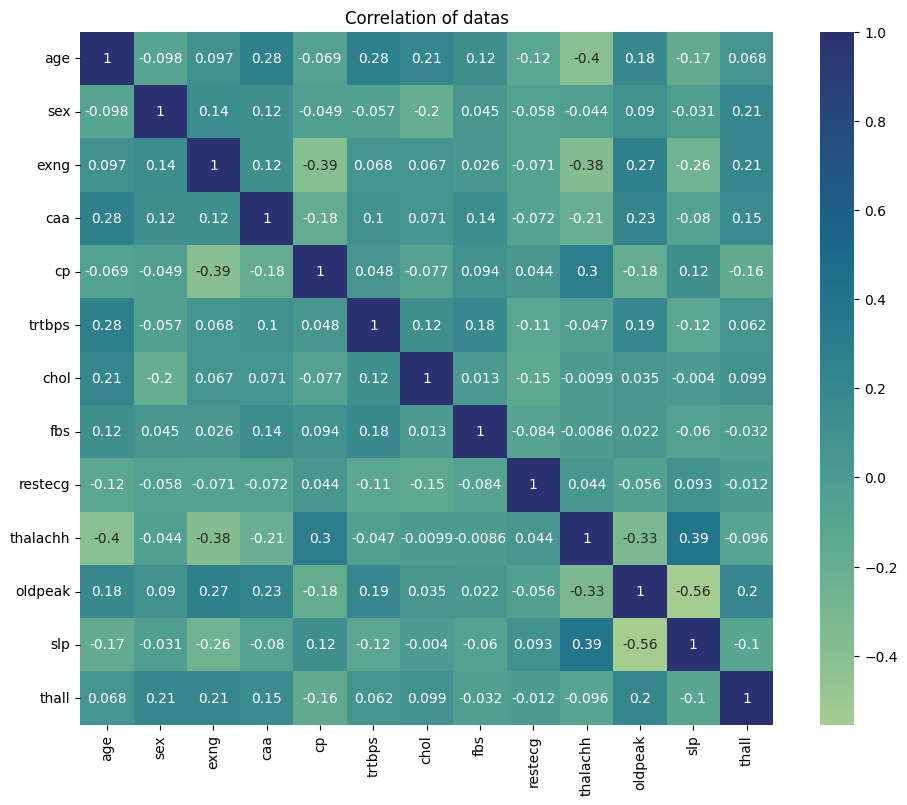

In [10]:
import seaborn as sns
correlation_matrix = features.corr()
plt.figure( figsize = ( 12, 9 ))
sns.heatmap( correlation_matrix, annot=True, cmap='crest', square=True )
plt.title( 'Correlation of datas' )
plt.show()

### Darker colored squares indicate more correlation :
   • cp : thalachh with 0.3 hast most correlation
There is a strong correlation between chest pain and maximum heart rate and can be a more weighted measure in calculations.
   • age : caa, trtbps with 0.28 
   • age : chol with 0.21
and others ...

## Decision Tree

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
from sklearn.tree import DecisionTreeClassifier
isheartattack = DecisionTreeClassifier( criterion="entropy", max_depth = 4 )
isheartattack.fit( X_train, y_train )
predTree = isheartattack.predict( X_test )
print( predTree [0:10] )
print( y_test [0:10] )

from sklearn import metrics
print( "DecisionTrees's Accuracy: ", metrics.accuracy_score( y_test, predTree ))

[0 0 1 1 1 0 1 1 1 1]
[1 0 1 1 0 0 0 1 1 1]
DecisionTrees's Accuracy:  0.8524590163934426


In [13]:
def plot_confusion_matrix( cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[19  6]
 [ 3 33]]


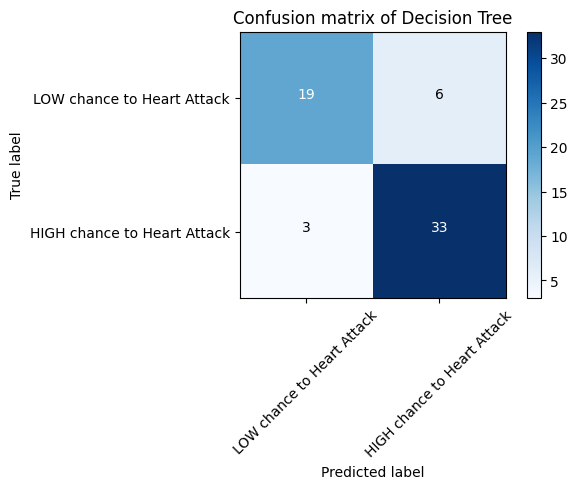

In [15]:
cnf_matrix = confusion_matrix( y_test, predTree, labels=[0,1] )
np.set_printoptions( precision=2 )
print (classification_report( y_test, predTree ))
plt.figure()
plot_confusion_matrix( cnf_matrix, classes=['LOW chance to Heart Attack','HIGH chance to Heart Attack'], normalize= False,  title='Confusion matrix of Decision Tree')

all methods for decision tree gets us this values
True predictions are good : 52 numbers :)
but 9 patients are in danger :(

## K-Nearest Neighbors

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform( X )
X [0:5]

array([[ 0.95,  0.68, -0.7 , -0.71,  1.97,  0.76, -0.26,  2.39, -1.01,
         0.02,  1.15, -2.27, -2.15],
       [-1.92,  0.68, -0.7 , -0.71,  1.  , -0.09,  0.07, -0.42,  0.9 ,
         1.63,  2.09, -2.27, -0.51],
       [-1.47, -1.47, -0.7 , -0.71,  0.03, -0.09, -0.82, -0.42, -1.01,
         0.98,  0.22,  0.98, -0.51],
       [ 0.18,  0.68, -0.7 , -0.71,  0.03, -0.66, -0.2 , -0.42,  0.9 ,
         1.24, -0.72,  0.98, -0.51],
       [ 0.29, -1.47,  1.44, -0.71, -0.94, -0.66,  2.08, -0.42,  0.9 ,
         0.58, -0.72,  0.98, -0.51]])

In [17]:
from sklearn.model_selection import train_test_split
Xkn_train, Xkn_test, ykn_train, ykn_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neighs = KNeighborsClassifier( n_neighbors = k ).fit( Xkn_train, ykn_train )
neighs

KNeighborsClassifier(n_neighbors=4)

In [19]:
yhatkn = neighs.predict( Xkn_test )
yhatkn[0:5]

array([0, 0, 1, 1, 0])

In [20]:
from sklearn import metrics
print( "Train set Accuracy: ", metrics.accuracy_score( ykn_train, neighs.predict( Xkn_train )))
print( "Test set Accuracy: ", metrics.accuracy_score( ykn_test, yhatkn ))

Train set Accuracy:  0.8553719008264463
Test set Accuracy:  0.8032786885245902


              precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.93      0.72      0.81        36

    accuracy                           0.80        61
   macro avg       0.81      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61

Confusion matrix, without normalization
[[23  2]
 [10 26]]


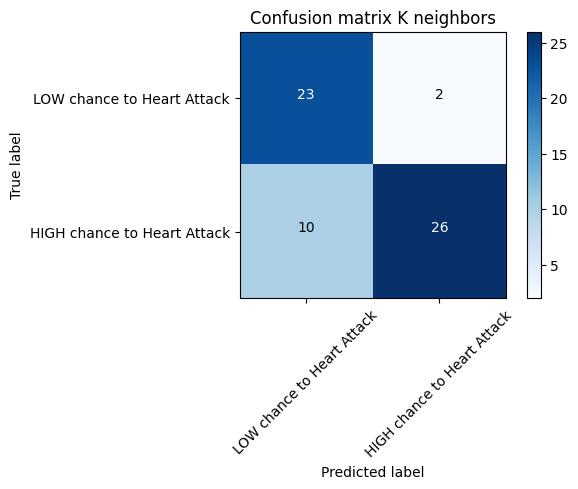

In [23]:
cnf_matrix_kn = confusion_matrix( ykn_test, yhatkn, labels=[0,1] )
np.set_printoptions( precision=2 )
print ( classification_report( ykn_test, yhatkn ))
plt.figure()
plot_confusion_matrix( cnf_matrix_kn, classes=['LOW chance to Heart Attack','HIGH chance to Heart Attack'], normalize= False,  title='Confusion matrix K neighbors' )

49 number of predictions are True :)
but 12 nember no :(
it is not a good way to predict...

## SVM

In [24]:
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split( X, y, test_size=0.2, random_state=4 )
print ( 'Train set:', X_trainsvm.shape,  y_trainsvm.shape)
print ( 'Test set:', X_testsvm.shape,  y_testsvm.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [25]:
from sklearn import svm
# 'linear'      --> 90% accuracy
# 'sigmoid'     --> 89% accuracy
# 'poly'        --> 85% accuracy
# 'rbf'         --> 87% accuracy
clf = svm.SVC( kernel = 'linear' )
clf.fit( X_trainsvm, y_trainsvm )

SVC(kernel='linear')

In [26]:
yhatsvm = clf.predict( X_testsvm )
yhatsvm [0:5]

array([1, 0, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[21  4]
 [ 4 32]]


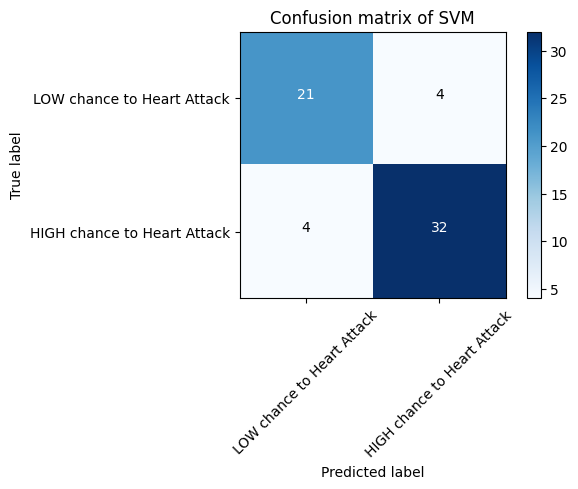

In [28]:
cnf_matrix_svm = confusion_matrix( y_testsvm, yhatsvm, labels=[0,1] )
np.set_printoptions( precision=2 )
print ( classification_report( y_testsvm, yhatsvm ))
plt.figure()
plot_confusion_matrix( cnf_matrix_svm, classes=['LOW chance to Heart Attack','HIGH chance to Heart Attack'], normalize= False,  title='Confusion matrix of SVM' )

linear method gets us the best answer :)
True detections are 53
and 8 number of them are incorrect

SVM is better than Others

## Result :)

SVM has the best accuracy for this question While the rest of the models have relatively good accuracies too
after SVM, Decision Tree and then KNN.

Accuracy of Methods :
   • SVM  ------------> 87 %
   • Decision Tree  --> 85 %
   • KNN  ------------> 80 %